In [50]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# import Dataset
df =pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 1] Check Shape of DF

In [52]:
#view shape
df.shape

(891, 12)

In [53]:
#view info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Step 2] Visualisation of null values

<AxesSubplot:>

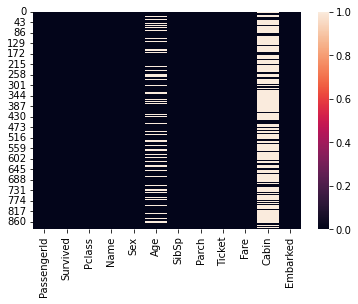

In [6]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA : Exploratory Data Analysis

### Problem Statement:
        
        Target Feature: Survived.  
          i.e we have to predict the survival
    
    

### step 1]   To check Balance or imblanace ..

        Always perform this test on target feature

In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
zero = (df["Survived"].value_counts()[0])/(df["Survived"].value_counts()[0] +df["Survived"].value_counts()[1])*100

zero

61.61616161616161

In [11]:
Once = (df["Survived"].value_counts()[1])/(df["Survived"].value_counts()[0] +df["Survived"].value_counts()[1])*100

Once

38.38383838383838

#### Around 60% -40% ...therefore okay

##### To represent above in graphical form

<AxesSubplot:xlabel='Survived', ylabel='count'>

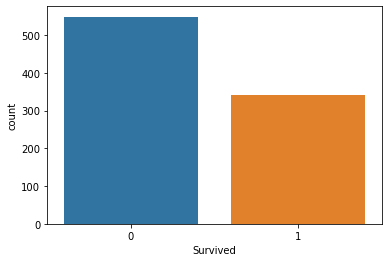

In [12]:
sns.countplot(x="Survived",data=df)

### Step 6] To check Distribution of Age

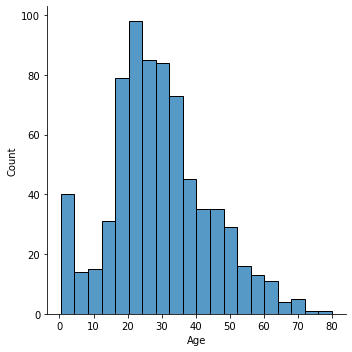

In [21]:
sns.displot(df["Age"])

#### Therefore, age plot is perfectly bell shaped

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

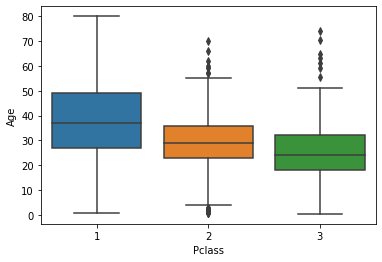

In [54]:
#to chheck outliers
sns.boxplot(x="Pclass", y="Age",data =df)

### And it have outliers

To remove outliers, we will replace them with median values.

But, to have more accuracy, we will replace median for each Pcalss separately

### Step 7] To Check Mean of Age Classwise

In [24]:
df[df["Pclass"]==1]["Age"].median()

37.0

In [27]:
df[df["Pclass"]==2]["Age"].median()

29.0

In [28]:
df[df["Pclass"]==3]["Age"].median()

24.0

### Therefore , we will have to replace null values in age by :
    
        class 1 by 37
        class 2 by 29
        class 3 by 24

### Step 8] Create Function

#### Lets make a function for this Imputation (Imputation means, replacing null values by other values)

In [18]:
def imputation(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [19]:
df["New_Age"]=df[["Age","Pclass"]].apply(imputation,axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,24.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


#### To check How null values get replaced in age

In [20]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,24.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,24.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,24.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,24.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,24.0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,24.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,24.0


### Step 9] Now Encode Sex

In [21]:
gender =pd.get_dummies(df["Sex"],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


### Step 10] Encode Embarked

In [22]:
embarked=pd.get_dummies(df["Embarked"], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


### Now concat gender and embarked in df

In [23]:
finaldf=pd.concat([df,gender,embarked],axis=1)

In [24]:
finaldf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,24.0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,1,0,0


### Now we have all required data in statistical forme.

Drop features which are not required. 

In [25]:
finaldf.drop(columns=["Sex","Name","Age","Embarked","Ticket","Cabin"],inplace=True)

In [26]:
finaldf

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
0,1,0,3,1,0,7.2500,22.0,1,0,1
1,2,1,1,1,0,71.2833,38.0,0,0,0
2,3,1,3,0,0,7.9250,26.0,0,0,1
3,4,1,1,1,0,53.1000,35.0,0,0,1
4,5,0,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,27.0,1,0,1
887,888,1,1,0,0,30.0000,19.0,0,0,1
888,889,0,3,1,2,23.4500,24.0,0,0,1
889,890,1,1,0,0,30.0000,26.0,1,0,0


## Now Develop ML MOdel

### Step 1] Convert data to X and Y axis

    X= All Independent Features, i.e features except target

    y= Only Target Feature

In [27]:
X=finaldf.drop("Survived",axis=1)
X

,PassengerId,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
0,1,3,1,0,7.2500,22.0,1,0,1
1,2,1,1,0,71.2833,38.0,0,0,0
2,3,3,0,0,7.9250,26.0,0,0,1
3,4,1,1,0,53.1000,35.0,0,0,1
4,5,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,13.0000,27.0,1,0,1
887,888,1,0,0,30.0000,19.0,0,0,1
888,889,3,1,2,23.4500,24.0,0,0,1
889,890,1,0,0,30.0000,26.0,1,0,0


In [28]:
Y=finaldf["Survived"]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Step 2] Split data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=45)

### Note:
    Above code created 4 df
    X_train,X_test,Y_train,Y_test
    
    As we have given 0.3 for testing, 
    70% data will be use for ML and 30 % for Testing

### Step 3] Implement Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
Y_pred =model.predict(X_test)

###  Step 4] To Check accuracy

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       178
           1       0.73      0.73      0.73        90

    accuracy                           0.82       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



### Step 5] Confusion MAtrix

In [37]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[153,  25],
       [ 24,  66]], dtype=int64)

### Confusion MAtrix:
    TP =153 
    FN = 25
    FP =24
    TN =66

### Accuracy = (TP +TN)/(All)

In [38]:
Accuracy =(153+66)/(153+25+24+66)
Accuracy

0.8171641791044776

In [39]:
# future prediction
T_sample=finaldf.sample()
T_sample

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
814,815,0,3,0,0,8.05,30.5,1,0,1


Note: In above sample, Passenger didnt survived (Survived =0)

In [47]:
# define X_new
X_new=T_sample.drop('Survived',axis=1)
X_new

,PassengerId,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
814,815,3,0,0,8.05,30.5,1,0,1


In [48]:
model.predict(X_new)

array([0], dtype=int64)

### Prediction of model is right  - - > 0